# So now we have done Data analysis and Visualozations.Lets start making some predictions .

# First of all we will be using the most successful ML algorithms in which target variable has been classified into three categories-
## 0-No chance of occuring of a Landslide
## 1-Small Landslide may occur
## 2-very high chances of a large Landslide

## Lets dice deep into our code and how we trained the classification models.

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [2]:
#Importing Datset
sdss_df = pd.read_csv('Classification2 - Sheet1.csv')

In [3]:
sdss_df.head()

,Activity,Trigger and reason,Length,Width,Height,Material,Movement,Hydrological,Landuse,Geoscientific reason,Landslide volume,Cummulative Rainfall,Rainfall Intensity,Product,Landslide predictability
0,1,2,20,30,20,1,3,1,6,1,150,40.0,0.25,10.00,0
1,2,1,150,700,150,3,2,4,2,1,200000,133.5,0.46,61.41,2
2,1,2,40,70,40,6,3,1,2,1,600,40.0,0.40,16.00,0
3,1,2,40,10,40,3,2,4,2,1,1000,55.0,0.70,38.50,1
4,1,3,25,35,25,3,4,6,3,1,3000,45.0,0.50,22.50,1


# Now we see whether the target variable is present in almost equal proportions or not because only then the models will be able to give good results

In [4]:
sdss_df['Landslide predictability'].value_counts()

1    74
0    71
2    52
3     1
5     1
Name: Landslide predictability, dtype: int64

# Now the most Important part in case of classification models is that all variales should be scaled.So we will be using MinmaxScaler function for that

In [5]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(sdss_df.drop('Landslide predictability', axis=1))

In [6]:
sdss

array([[0.        , 0.2       , 0.06060606, ..., 0.14285714, 0.02777778,
        0.04028436],
       [0.5       , 0.        , 0.45454545, ..., 0.5244898 , 0.14444444,
        0.28393365],
       [0.        , 0.2       , 0.12121212, ..., 0.14285714, 0.11111111,
        0.06872038],
       ...,
       [0.        , 0.6       , 0.03030303, ..., 0.10204082, 0.32777778,
        0.10521327],
       [0.5       , 0.6       , 0.06060606, ..., 0.06938776, 0.27777778,
        0.06587678],
       [1.        , 0.        , 0.06060606, ..., 0.06938776, 0.27777778,
        0.06587678]])

## We see that all the features except the target variable have been scaled in range of 0-1.Now we will be spillting the train and test in ratio of 67 and 33 .

## Note that all variables apart from target one is taken in input feature X_train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(sdss, sdss_df['Landslide predictability'], test_size=0.33)

# So the first classification algorithm we are going to use is K Neighbours Classifier.First lets understand how it works.

### K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
### K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
### K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

## Can be very easily understood with the help of this image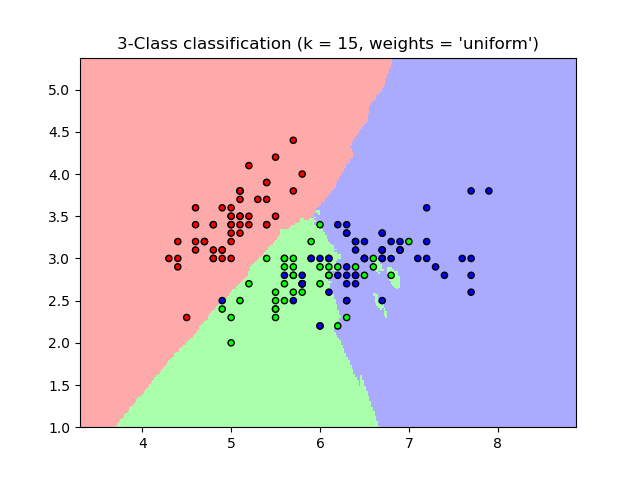

# So in below code snippet we have trained k neighbour classifier model and mad epredictions on target variable using it.
# We have also calculated the accuracy with which the model is working

In [8]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 65.15
Time consumed for training: 0.010 seconds
Time consumed for prediction: 0.00430 seconds


In [9]:
## We are getting accuracy of 65.15 percent.This is not a very great accuracy score and it is because of the reason that k neighbour classifier works best with less input features and we will try to tune it later and see which variables are most important.

## Next classification model we are going to use is Naive Bayes method

## Naive Bayes is a probabilistic machine learning algorithm that can be used in a wide variety of classification tasks. The name naive is used because it assumes the features that go into the model is independent of each other.

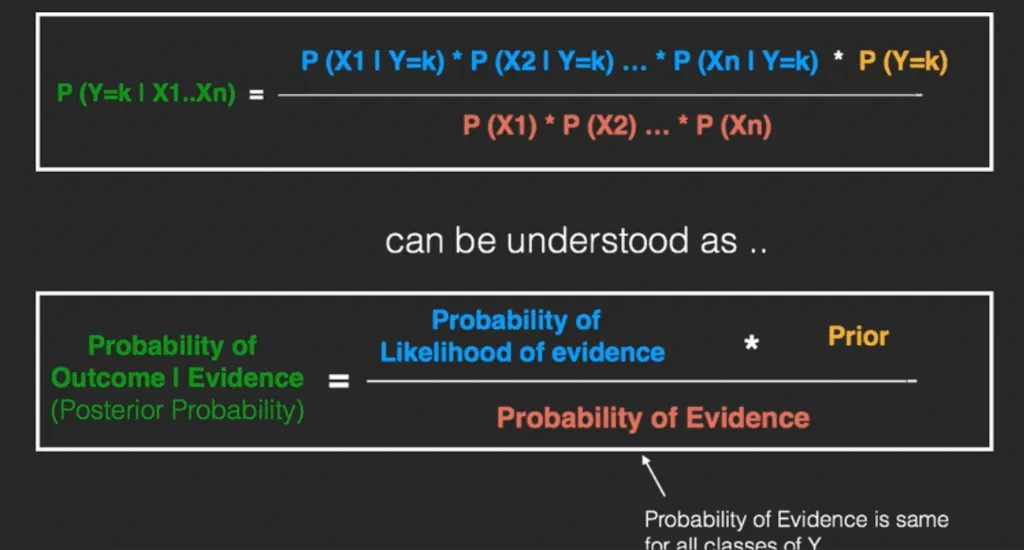

# Now let's train our guassian naive bayes classifier and see with how much much accuracy it is able to classify the target variables.

In [10]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(sdss_df.drop('Landslide predictability', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, sdss_df['Landslide predictability'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 90.91
Time consumed for training: 0.007 seconds
Time consumed for prediction: 0.00040 seconds


<AxesSubplot:>

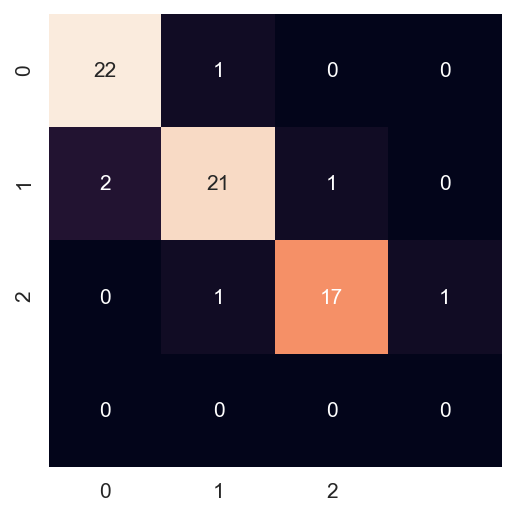

In [12]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, y_test_gnb)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)

## Now we see that naive bayes classification algo is giving us accuracy of 90.91 which is also supported by the confusion matrix drawn.Hence naive bayes classification model is working pretty well for our dataset.

# We will be using one more very strong classifcation model-XG Boost Classifier.Its working can be explained from the following figure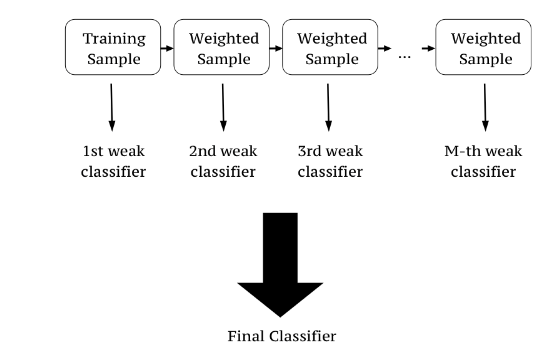

## Now lest's train our XG bosst classifier model ,predict using it and calculate its accuracy

In [13]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

C:\Users\ajite\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 92.42
Time consumed for training: 1.332
Time consumed for prediction: 0.00333 seconds


<AxesSubplot:>

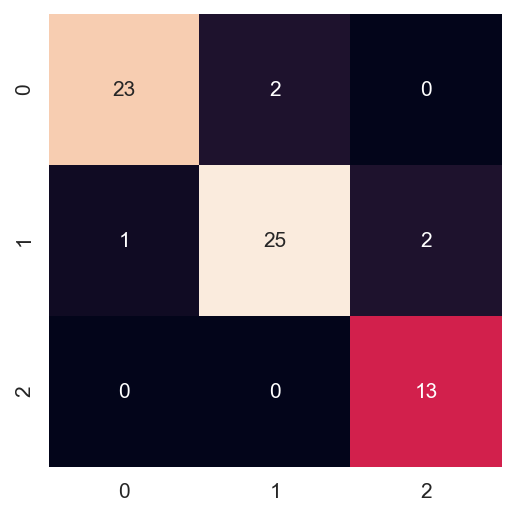

In [14]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, y_test)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)

## So we are getting a accuracy of 92.42 justified by confusion matrix .Hence naive bayes and XG Boost will work very well for our Classification text.

## Now lets try to improve the accuracy of K neighbour classifier by using 4 features .In this way we will also be able to hypertune our parameters.

In [15]:
sdss_df = pd.read_csv('Classification - Sheet1.csv')

In [16]:
sdss_df.head()

,Activity,Trigger and reason,Landslide volume,Cummulative Rainfall,Rainfall Intensity,Product,Landslide predictability
0,Active,flooding,150,40.0,0.25,10.00,0
1,Reactivated,continous rainfall,200000,133.5,0.46,61.41,2
2,Active,flooding,600,40.0,0.40,16.00,0
3,Active,flooding,1000,55.0,0.70,38.50,1
4,Active,Heavy rain,3000,45.0,0.50,22.50,1


## Here we see we are having just 5 features .

In [17]:
sdss_df.drop(['Activity','Trigger and reason'], axis=1, inplace=True)
scaler = MinMaxScaler()
sdss = scaler.fit_transform(sdss_df.drop('Landslide predictability', axis=1))
X_train, X_test, y_train, y_test = train_test_split(sdss, sdss_df['Landslide predictability'], test_size=0.33)
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 84.85
Time consumed for training: 0.001 seconds
Time consumed for prediction: 0.00375 seconds


## So by using these 5 features we were able to significantly improve the accuracy of of our k neighbour classifier model and hence we will be using these 5 input features in our regression models.